## Integrate and Fire Model 
### Group 6: *Maia Barrow, Cianna French, Eden La Kier Sydney Moodie, Wasifa Nasrin, Kelly Stouffer, Vivan Tadakamalla*
 An integrated firing model, or IF for short, is one of the most popular models used in computational neuroscience for modeling and analyzing the behavior of neural systems in response to a stimulus. The IF model is a simplified neuron model and can illustrate how electrical input is accumulated over time. 

Some uses of IF models in research:
1. Population Activity
    * Integrate-and-Fire models can be used to understand spiking behaviors of specific neuronal populations. This can be analyzed to see how populations synchronize firing due to a stimulus. 
2. Neurodegenerative Research 
    * IFM's can be used to study changes in neuron firing as a result of degenerative diseases such as Parkinsons and Alzheimers. 
    * This article talks about modifications made to the integrate-and-fire model to account for metabolic dependencies which are characteristic in certain neurodegenerative disease pathology. https://onlinelibrary.wiley.com/doi/10.1111/ejn.15326 


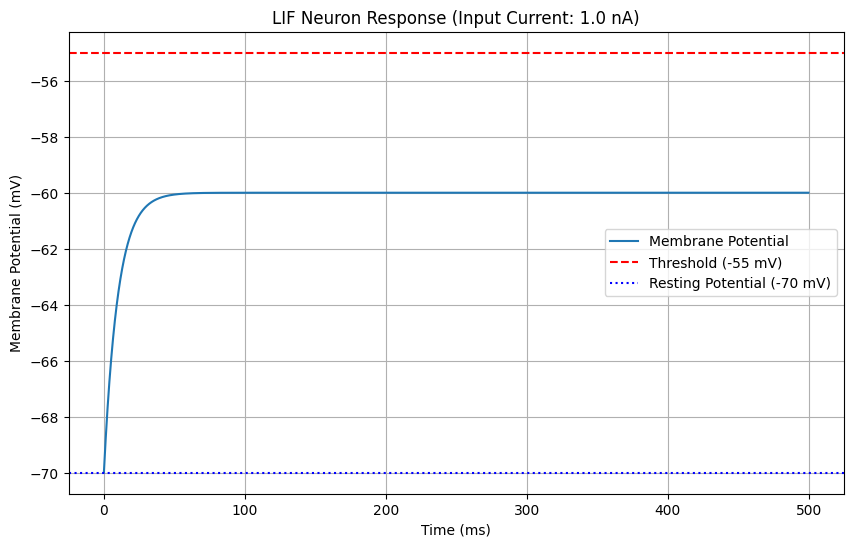

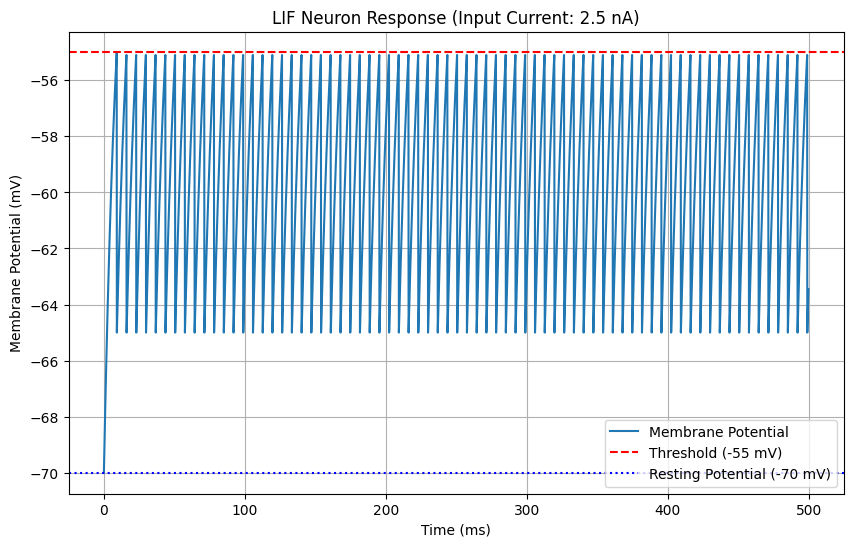

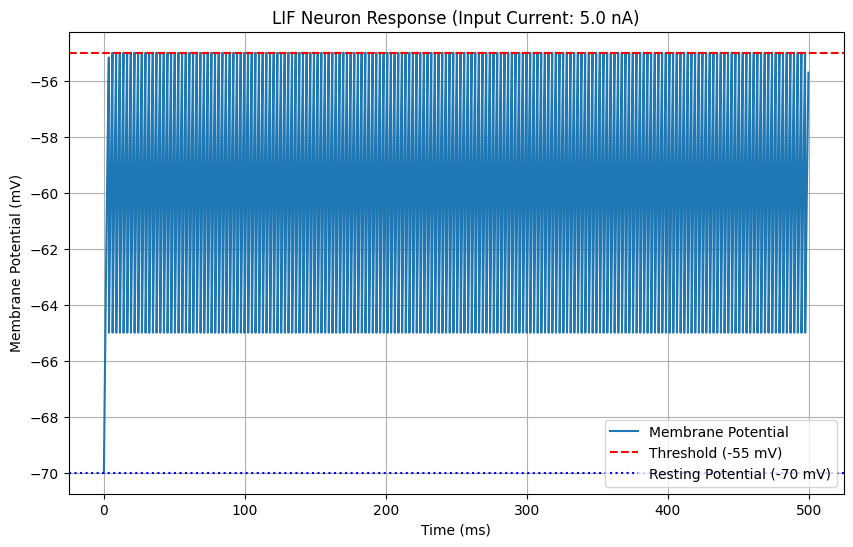

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0          # Threshold potential in mV
reset_potential = -65.0    # Reset potential after a spike in mV
membrane_resistance = 10.0 # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    """
    Simulates a leaky integrate-and-fire neuron.

    Parameters:
        input_current (array): Input current in nA (one value per time step).
        dt (float): Time step for simulation in ms.
        simulation_time (float): Total simulation time in ms.

    Returns:
        time (array): Array of time points.
        membrane_potential (array): Membrane potential over time.
        spikes (list): Indices of spike times.
    """
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []

    for t in range(1, num_steps):
        # Update membrane potential based on LIF equation
        dv = (
            (-membrane_potential[t-1] + resting_potential + \
             membrane_resistance * input_current[t]) \
            / membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        # Check for spike
        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)  # Record spike time

    return time, membrane_potential, spikes

# Simulation parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

def run_simulation_and_plot(input_current_amplitude):
    # Generate input current (constant input)
    input_current = np.full(int(simulation_time / dt), input_current_amplitude)

    # Simulate LIF model
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(f"LIF Neuron Response (Input Current: {input_current_amplitude} nA)")
    plt.legend()
    plt.grid()
    plt.show()

# Run simulations with different input currents
input_currents = [1.0, 2.5, 5.0]  # Input currents in nA
for input_current in input_currents:
    run_simulation_and_plot(input_current)


**Looking at the above visualization/based on what you know regarding the LIF model--what aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron? Compare and Contrast the two.**

Similarities | Differences
------------ | -------------
The LIF and biological neuron both have leaky channels, showing a loss of current. | The biological neuron also loses current in other ways, such as constantly through the chemical synapse, at the gap junction of electrical synapses, or when neurotransmitters don't bind to receptors. On the other hand, the LIF doesn't show that. 
The LIF and biological neuron show that threshold should be crossed before an action potential can be made. | However, spike generation is not detailed in the LIF model, thus excluding voltage-gated ion channels. The biological neuron demonstrates this though. 
With more current typically comes faster voltage because more ions are following through the neuron/circuit. | Because the biological neuron's refractory periods are based on the inactivation and closing of voltage-gated sodium channels, this is harder to represent in the LIF model. 
Similar to the process of summation within biological neurons, the LIF model has a similar feature that integrates IPSPs and EPSPs over a set amount of time to produce a gicen output | The LIF model is not complex enough to replicate the spatial structure of the neuron, oversimplifying it as a single pouint rather than multiple parts like the soma, axon, and dendrites. There may be issues with accuracy due to the lack of spatially dependent integration.
The LIF model and biological model both incorperate the use of temporal coding and summation, relying on this synchronization feature to time when the action potential fires | The LIF model has no way of representing the biological process of synaptic plasticity or learned behavior, which would theoretically result in increased efficency.
The LIF model stimulates temporal summation of inputs, which is when signals accumulate over a period of time to potentially conduct an action potential, akin to a biological neuron | Biological neurons are influenced by noise and random synaptic inputs, which leads to irregular responses. However, in the LIF model, because it often has predictible behavior, it would not be realistic in this sense.
Both LIF model and biological neruons have resting potentials that requires energy to be sustained. In a biological neuron, it is maintained via ion pumps whereas in the LIF model, it is shown as a constant rmp. | The LIF model does not account for the different ion pumps and simplifies it to a single leakage term.

**What was the most challenging aspect of this homework?**
Coming up with the comparisons and contrasts! In addition, getting used to Jupyter and GitHub took a little bit of time!

**Estimate how long it took you to complete this homework.**It took 3-4 hours collectivley between the work contributed by all groupmates. This was largely due to diffuculties with nativating the platform.



**## Leaky Integrate and Fire Model** 
### *The LIF model illustrates the loss of current through leaky channels, thus promoting more accuracy between electrical and biological representations of neurons. However, while the LIF model identifies signal integration to reach threshold, it does not show spike generation with voltage-gated channels at all, reducing its biological accuracy. On the other hand, the HH model shows signal integration (with graded potentials reaching threshold to create action potentials AND a loss of current through leaky channels) AND spike generation with voltage-gated channels. However, the HH model uniformly treats all ions and all parts of the neuron, like the dendrites and the synapse, the same when different ions perform different functions and spatial summation makes integration more complicated.
*